In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('credit_risk_dataset.csv')

# Display the first few rows of the dataframe
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Analyzing Loan Default Rates by Loan Intent

In [18]:
# Assuming df is already loaded with your dataset

# Group by 'loan_intent' and calculate the default rate, then sort by default rate in descending order
default_rates = df.groupby('loan_intent')['loan_status'].agg(['mean', 'count']).rename(columns={'mean': 'default_rate', 'count': 'total_loans'}).sort_values(by='default_rate', ascending=False)

# Format the default_rate column to show as percentage
default_rates['default_rate'] = (default_rates['default_rate'] * 100).apply(lambda x: f"{x:.2f}%")

# Optionally, enhance the table presentation
print("Default Rates by Loan Intent (Ordered by Default Rate):")
print(default_rates)


Default Rates by Loan Intent (Ordered by Default Rate):
                  default_rate  total_loans
loan_intent                                
DEBTCONSOLIDATION       28.59%         5212
MEDICAL                 26.70%         6071
HOMEIMPROVEMENT         26.10%         3605
PERSONAL                19.89%         5521
EDUCATION               17.22%         6453
VENTURE                 14.81%         5719


# Visualizing the Relationship Between Age and Income with Linear and Non-Linear Models

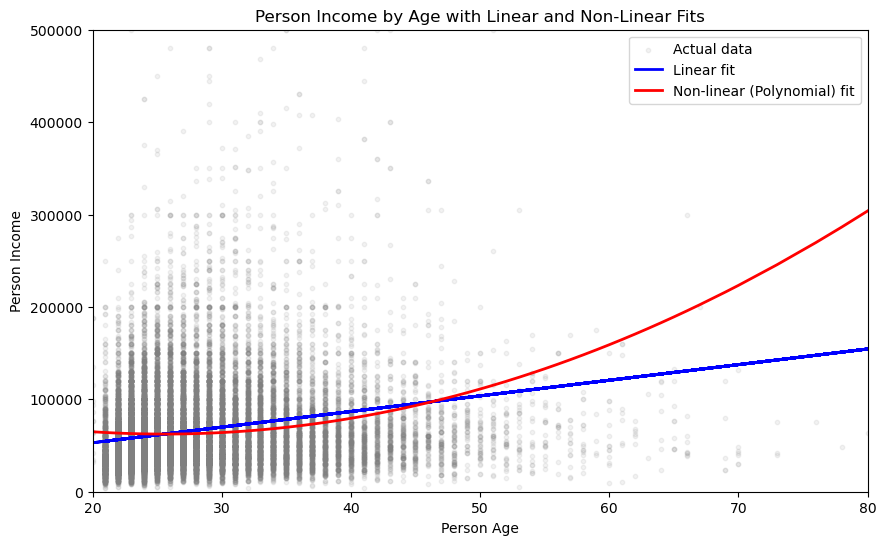

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assuming df is your DataFrame with the dataset

# Isolate 'person_age' and 'person_income' for the analysis
X = df['person_age'].values.reshape(-1, 1)  # Predictor
y = df['person_income']  # Response

# Linear Fit
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Non-linear Fit (Polynomial degree 2 for demonstration)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
non_linear_model = LinearRegression()
non_linear_model.fit(X_poly, y)
y_pred_non_linear = non_linear_model.predict(X_poly)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data
plt.scatter(X, y, color='gray', alpha=0.1, s=10, label='Actual data')

# Linear fit
plt.plot(X, y_pred_linear, color='blue', linewidth=2, label='Linear fit')

# Non-linear fit
# Sorting the values is necessary for a smooth polynomial curve
sorted_zip = sorted(zip(X, y_pred_non_linear))
x_poly, y_poly_pred = zip(*sorted_zip)
plt.plot(x_poly, y_poly_pred, color='red', linewidth=2, label='Non-linear (Polynomial) fit')

plt.xlabel('Person Age')
plt.ylabel('Person Income')
plt.title('Person Income by Age with Linear and Non-Linear Fits')
plt.legend()

# Limiting the axes as requested
plt.xlim(20, 80)
plt.ylim(0, 1e6/2)

plt.show()


# Visualizing the Relationship Between Loan Amount and Income with Linear and Non-Linear Models

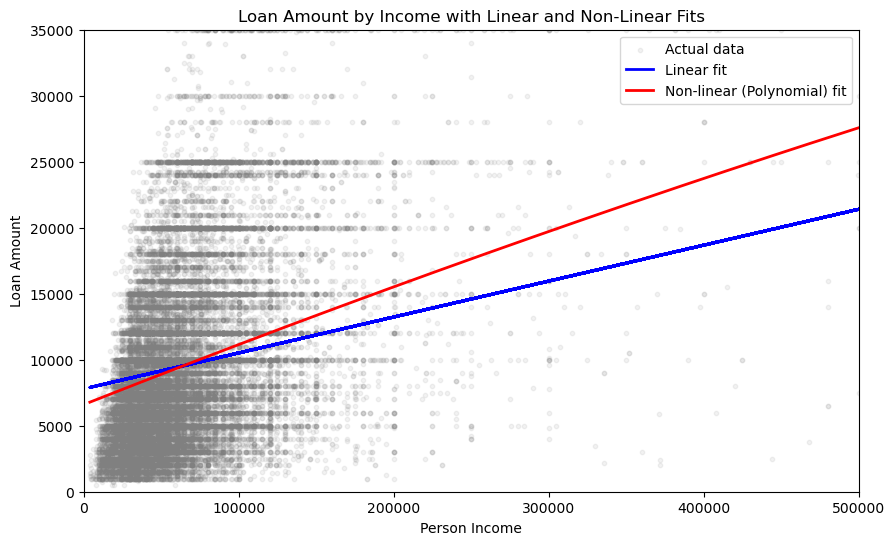

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assuming df is your DataFrame with the dataset

# Isolate 'person_income' as X and 'loan_amnt' as y for the analysis
X = df['person_income'].values.reshape(-1, 1)  # Predictor
y = df['loan_amnt']  # Response

# Linear Fit
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Non-linear Fit (Polynomial degree 2 for demonstration)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
non_linear_model = LinearRegression()
non_linear_model.fit(X_poly, y)
y_pred_non_linear = non_linear_model.predict(X_poly)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data
plt.scatter(X, y, color='gray', alpha=0.1, s=10, label='Actual data')

# Linear fit
plt.plot(X, y_pred_linear, color='blue', linewidth=2, label='Linear fit')

# Non-linear fit
# Sorting the values is necessary for a smooth polynomial curve
sorted_zip = sorted(zip(X, y_pred_non_linear))
x_poly, y_poly_pred = zip(*sorted_zip)
plt.plot(x_poly, y_poly_pred, color='red', linewidth=2, label='Non-linear (Polynomial) fit')

plt.xlabel('Person Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Income with Linear and Non-Linear Fits')
plt.legend()

# Limiting the axes as you requested
plt.xlim(0, 1e6/2) 
plt.ylim(0, df['loan_amnt'].max())  # Adjust based on the maximum loan amount or another logical limit

plt.show()


# LogisticRegression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define categorical and numeric columns
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
numeric_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Define transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the dataset into features and target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

# Create a modeling pipeline that includes preprocessing and the classifier
model = make_pipeline(preprocessor, LogisticRegression(random_state=42))

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.92      5072
           1       0.77      0.55      0.64      1445

    accuracy                           0.86      6517
   macro avg       0.82      0.75      0.78      6517
weighted avg       0.86      0.86      0.85      6517

[[4832  240]
 [ 655  790]]


/Users/dadmehr/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Evaluation Summary

- **Accuracy**: 86% - The model correctly predicted the outcome for 86% of all test cases.

#### Precision and Recall
- **Precision**:
  - Class 0 (No Default): 88% - High precision indicates the model's high accuracy in predicting non-default cases.
  - Class 1 (Default): 77% - Lower precision suggests more false positives for default cases.
- **Recall**:
  - Class 0: 95% - High recall indicates the model is very effective at identifying non-default cases.
  - Class 1: 55% - Lower recall indicates the model missed a significant number of default cases.

#### F1-Score
- Reflects the balance between precision and recall.
  - Class 0: 0.92 - High F1-score indicates good model performance for non-default cases.
  - Class 1: 0.64 - Moderate F1-score suggests room for improvement in predicting default cases.

#### Confusion Matrix
- **[4832  240]**
  - True Negatives (TN): 4832
  - False Positives (FP): 240
- **[ 655  790]**
  - False Negatives (FN): 655
  - True Positives (TP): 790

### Conclusion
The model performs well in identifying non-default cases but could be improved in accurately predicting default cases, as indicated by lower recall and F1-score for Class 1.


# RandomForestClassifier

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define categorical and numeric columns
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
numeric_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Define transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the dataset into features and target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a modeling pipeline that includes preprocessing and the RandomForestClassifier
model = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.97      0.72      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.95      0.86      0.89      6517
weighted avg       0.94      0.93      0.93      6517

[[5037   35]
 [ 400 1045]]


# RandomForestClassifier vs. LogisticRegression: Results Summary

#### Precision and Recall Improvements
- **Precision**:
  - Class 0 (No Default): Improved to 93% from 88% with LogisticRegression.
  - Class 1 (Default): Significantly increased to 97% from 77% with LogisticRegression.

- **Recall**:
  - Class 0: Slightly improved to 99% from 95% with LogisticRegression.
  - Class 1: Improved to 72% from 55% with LogisticRegression, indicating better identification of default cases.

#### F1-Score Enhancement
- Class 0: Increased to 0.96 from 0.92 with LogisticRegression, indicating a more balanced precision and recall.
- Class 1: Improved to 0.83 from 0.64 with LogisticRegression, showing enhanced model performance for default prediction.

#### Accuracy and Overall Model Performance
- The accuracy of the model increased significantly to 93% from 86% with LogisticRegression, indicating a more reliable prediction across both classes.

#### Confusion Matrix: Reduced Misclassifications
- **With RandomForestClassifier**:
  - True Negatives (TN): Increased to 5037 from 4832 with LogisticRegression.
  - False Positives (FP): Decreased to 35 from 240, indicating fewer incorrect default predictions.
  - False Negatives (FN): Decreased to 400 from 655, showing better identification of actual defaults.
  - True Positives (TP): Increased to 1045 from 790, indicating more accurate default predictions.

## Conclusion
The RandomForestClassifier demonstrates superior performance over LogisticRegression in all key metrics: precision, recall, F1-score, and overall accuracy. Particularly, it shows a remarkable improvement in correctly predicting default cases (Class 1), making it a more effective model for credit risk assessment.
